# ***YULU BIKE ~ Hypothesis Testing***
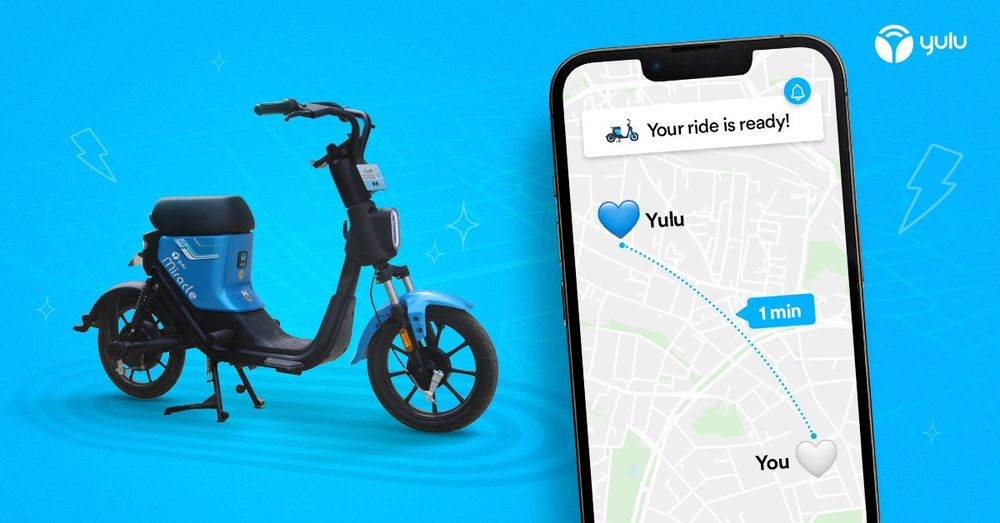

## **About ~ Yulu**
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

### **Business Problem**
Recently, Yulu has experienced a **decline in revenue**, indicating a potential reduction in demand for its shared electric cycles. To address this issue, Yulu has engaged a consulting team to analyze historical rental data and identify the key factors influencing customer demand in the Indian market.

The company wants to know:

- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

- How well those variables describe the electric cycle demands

### **Objective of the Analysis**
The objectives of this analysis are to:

- Identify key variables that significantly influence the demand for shared electric cycles.

- Examine whether demand differs on working days vs non-working days

- Analyze how seasonal and weather conditions impact rental volume

- Determine whether weather conditions depend on seasons

- Provide actionable business insights and recommendations to help Yulu improve revenue and operational efficiency

### **Dataset:**

**Column Profiling:**

- datetime: datetime

- season: season (1: spring, 2: summer, 3: fall, 4: winter)

- holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

- weather:
  - 1: Clear, Few clouds, partly cloudy

  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

- temp: temperature in Celsius

- atemp: feeling temperature in Celsius

- humidity: humidity

- windspeed: wind speed

- casual: count of casual users

- registered: count of registered users

- count: count of total rental bikes including both casual and registered

## **Importing Libraries and Reading Dataset**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

!wget --no-check-certificate "https://drive.google.com/uc?export=download&id=12eYx8SFPhXyaR8_LUc5UtAivID2aC_Kn" -O yulu_data.csv
yulu_df = pd.read_csv("yulu_data.csv")
yulu_df

--2026-01-29 06:30:56--  https://drive.google.com/uc?export=download&id=12eYx8SFPhXyaR8_LUc5UtAivID2aC_Kn
Resolving drive.google.com (drive.google.com)... 74.125.134.101, 74.125.134.113, 74.125.134.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.134.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=12eYx8SFPhXyaR8_LUc5UtAivID2aC_Kn&export=download [following]
--2026-01-29 06:30:56--  https://drive.usercontent.google.com/download?id=12eYx8SFPhXyaR8_LUc5UtAivID2aC_Kn&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.11.132, 2607:f8b0:400c:c01::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.11.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [application/octet-stream]
Saving to: ‘yulu_data.csv’

yulu_data.csv       100%[===================>] 633.16K  --.-KB/s  

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


**Create a working copy to preserve the integrity of the original dataset**

In [2]:
df = yulu_df.copy()
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
print(f"Dataset Dimensions: {df.shape[0]} rows × {df.shape[1]} columns")

Dataset Dimensions: 10886 rows × 12 columns


In [4]:
print("Dataset Information:")
print("-" * 42)
df.info()

Dataset Information:
------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**Check for missing and duplicate values in the dataset**

In [5]:
df.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [6]:
df.duplicated().sum()

np.int64(0)

**Dataset Overview**

**Dimensions:** 10,886 hourly observations × 12 variables

The Yulu dataset consists of 10,886 rows and 12 columns. Each record corresponds to the number of electric cycles rented during a specific hour along with associated temporal, weather, and operational attributes

**Feature Categories:**

- **Temporal:** `datetime` (string format)

- **Categorical:** `season`, `holiday`, `workingday`, `weather` (numerically encoded)

- **Environmental:** `temp`, `atemp`, `humidity`, `windspeed` (continuous)

- **Demand:** `casual`, `registered`, `count` (count variables)


**Data Quality:**

- No missing values detected

- No duplicate records present

- Categorical variables require proper type conversion for analysis

- Temporal feature needs parsing from string to datetime format

**Target Variable:** `count` (total electric cycle rentals per hour)

**Skewness of each column**

In [7]:
df.skew(numeric_only=True)

,0
season,-0.007076
holiday,5.660517
workingday,-0.776163
weather,1.243484
temp,0.003691
atemp,-0.102560
humidity,-0.086335
windspeed,0.588767
casual,2.495748
registered,1.524805


**Symmetrical Majority:**

- The majority of the variables, including 'season' and 'temp', exhibit skewness values close to zero, suggesting relatively symmetrical distributions.

**Positive Skewness Insights:**

- Variables such as 'holiday', 'weather', 'windspeed', 'casual', 'registered', and 'count' demonstrate positive skewness, pointing to a concentration of lower values and a rightward skew in their distributions.

**Negative Skewness Observations:**

- In contrast, 'workingday', 'atemp', and 'humidity' exhibit negative skewness, implying a concentration of higher values and a leftward skew in their distributions.

**Since demand-related variables show right-skewness, normality assumptions will be validated during hypothesis testing to select appropriate parametric or non-parametric tests.**

**Generate comprehensive descriptive statistics**

In [8]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
df.describe(include="O")

,datetime
count,10886
unique,10886
top,2012-12-19 23:00:00
freq,1


**Statistical Summary**

-  The average number of rentals (count) is approximately 192 bikes per hour, with a wide standard deviation, indicating high variability in demand.

- The median count (145) is lower than the mean, suggesting a right-skewed distribution, which aligns with real-world demand patterns where peak hours generate high rentals.

- Registered users contribute significantly more to total demand compared to casual users.

- Weather and environmental variables such as temperature, humidity, and windspeed show reasonable ranges without unrealistic values.

In [10]:
df.memory_usage()

,0
Index,132
datetime,87088
season,87088
holiday,87088
workingday,87088
weather,87088
temp,87088
atemp,87088
humidity,87088
windspeed,87088


## **Data Cleaning and Pre-processing**
**Conversion of Data columns**

In [11]:
df['datetime'] = pd.to_datetime(df['datetime']) # converting datetime to datetime column

cat_col = ['season', 'holiday', 'workingday', 'weather'] # converting numerical to categorical data type
for _ in cat_col:
 df[_] = df[_].astype('category')

**Creating New Columns (hour, month)**

In [12]:
df['hour']=df['datetime'].dt.hour
df['month']=df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

**Replaced numeric codes with meaningful labels for interpretability**

In [13]:
# change of season
df['season'] = df['season'].replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

# change of weather
df['weather'] = df['weather'].replace({1: 'Clear',2: 'Mist/Cloudy',3: 'Light Rain/Snow',4: 'Heavy Rain/Snow'})

# change of holiday
df['holiday'] = df['holiday'].replace({0:'No',1:'Yes'})

# change of workingday
df['workingday'] = df['workingday'].replace({0:'No',1:'Yes'})

# change of month
df['month'] = df['month'].replace({1: 'January',2: 'February',3: 'March',4: 'April',
                                   5: 'May',6: 'June',7: 'July',8: 'August',
                                   9: 'September',10: 'October',11: 'November',12: 'December'})

- Readable labels make analysis and stakeholder communication far more effective.

**Checking Disparty in data**

In [14]:
(df['casual'] + df['registered'] == df['count']).value_counts()

,count
True,10886


- Target variable (count) is internally consistent → no leakage or calculation errors.

### **Non-Graphical Analysis**

**Q. What is the Time Period for the given dataset ?**

In [15]:
df['datetime'].max() - df['datetime'].min()

Timedelta('718 days 23:00:00')

- Data spans ~2 years (2011–2012) :- This ensures seasonality and demand cycles are well represented.

In [16]:
df.nunique()

,0
datetime,10886
season,4
holiday,2
workingday,2
weather,4
temp,49
atemp,60
humidity,89
windspeed,28
casual,309


In [17]:
cat_col = ['season', 'holiday', 'workingday', 'weather']

def unique_check(df, col_name):
  print("Unique Values : ", df[col_name].unique())
  print("Value Count : ")
  print(df[col_name].value_counts())

for col in cat_col:
  print("Column Name : ", col)
  unique_check(df, col_name = col)
  print("-----" * 10)

Column Name :  season
Unique Values :  ['Spring', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Spring', 'Summer', 'Fall', 'Winter']
Value Count : 
season
Winter    2734
Summer    2733
Fall      2733
Spring    2686
Name: count, dtype: int64
--------------------------------------------------
Column Name :  holiday
Unique Values :  ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
Value Count : 
holiday
No     10575
Yes      311
Name: count, dtype: int64
--------------------------------------------------
Column Name :  workingday
Unique Values :  ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
Value Count : 
workingday
Yes    7412
No     3474
Name: count, dtype: int64
--------------------------------------------------
Column Name :  weather
Unique Values :  ['Clear', 'Mist/Cloudy', 'Light Rain/Snow', 'Heavy Rain/Snow']
Categories (4, object): ['Clear', 'Mist/Cloudy', 'Light Rain/Snow', 'Heavy Rain/Snow']
Value Count : 
weather
Clear              7192
Mist/Cloudy        2834

**Category Distribution Highlights**

- Weather
  - Clear: ~66%
  - Heavy Rain/Snow: almost negligible (1 record)

- Working Day
  - Working days dominate demand data (~68%)
- Holiday
  - Only ~3% holidays → may affect statistical power

**Weather category 4 (Heavy Rain/Snow) was removed due to extremely low frequency (only one observation), which could adversely affect the reliability of statistical tests.**

In [18]:
df = df[df['weather'] != "Heavy Rain/Snow"]
df['weather'] = df['weather'].cat.remove_unused_categories()

- Removing extremely rare categories avoids biased test statistics and unstable group comparisons.


In [19]:
time_col = ['hour', 'year','month']

def unique_check(df, col_name):
  print("Value Count : ")
  print(df[col_name].value_counts())

for col in time_col:
  print("Column Name : ", col)
  unique_check(df, col_name = col)
  print("-----" * 10)

Column Name :  hour
Value Count : 
hour
16    456
17    456
19    456
20    456
12    456
13    456
14    456
15    456
22    456
21    456
23    456
11    455
8     455
6     455
7     455
0     455
10    455
9     455
18    455
1     454
5     452
2     448
4     442
3     433
Name: count, dtype: int64
--------------------------------------------------
Column Name :  year
Value Count : 
year
2012    5463
2011    5422
Name: count, dtype: int64
--------------------------------------------------
Column Name :  month
Value Count : 
month
August       912
July         912
June         912
May          912
December     912
October      911
November     911
April        909
September    909
February     901
March        901
January      883
Name: count, dtype: int64
--------------------------------------------------


In [20]:
df.memory_usage()

,0
Index,87080
datetime,87080
season,11089
holiday,11009
workingday,11009
weather,10909
temp,87080
atemp,87080
humidity,87080
windspeed,87080


- decrease the memory allocation in the data.

### **Correlation Analysis Through Heatmap**

<function matplotlib.pyplot.show(close=None, block=None)>

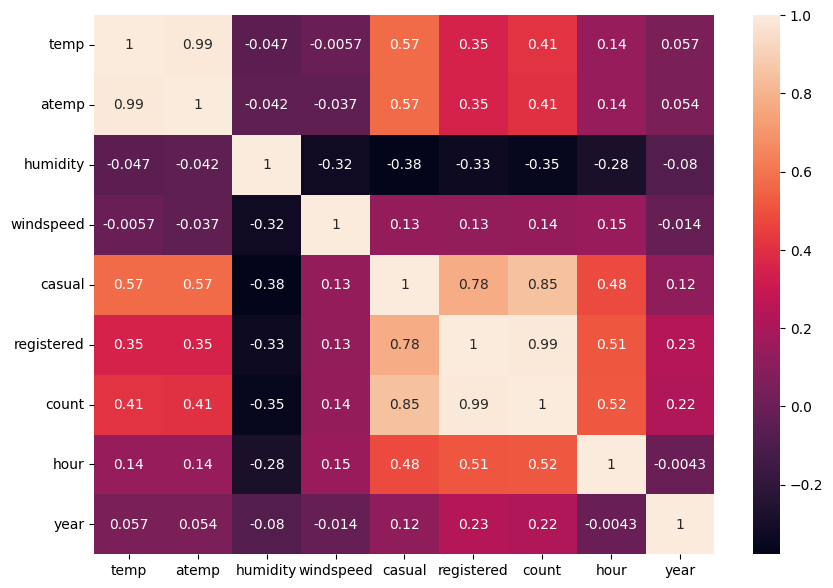

In [21]:
df_num_only = df.select_dtypes(include=('float','int'))
plt.figure(figsize=(10,7))
sns.heatmap(df_num_only.corr(method='spearman'), annot=True)
plt.show

**Why Spearman?**
- Spearman correlation is robust to non-normal distributions and skewness—appropriate given right-skewed demand variables.

**Key Correlation Insights**

- Temperature Metrics: `temp and atemp` show near-identical patterns (ρ = 0.99), validating their interchangeable use for analysis.

- Demand Drivers: Total rental count (count) is strongly correlated with registered users (ρ = 0.85), indicating this segment drives overall business volume.

- Weather Impact: Negative correlations between wind speed and user metrics suggest weather-sensitive demand patterns.

- Segmented Analysis: Casual users show weaker correlations with environmental factors compared to registered users.

- Time-Based Effects : hour shows a moderate positive correlation with demand & month shows weak correlation

**From this correlation we can verify some insights :-**

- Feeling Temperature or Aparent Tempreature are highly correlated because they are most of the time are approximately the same and have very small difference

- count, casual, and registered are intrinsically correlated because total rentals (count) equal the sum of casual and registered users (count = casual + registered).

In [22]:
# Dropping highly correlated columns
df.drop(columns=['casual', 'registered', 'atemp']).head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count,hour,month,year
0,2011-01-01 00:00:00,Spring,No,No,Clear,9.84,81,0.0,16,0,January,2011
1,2011-01-01 01:00:00,Spring,No,No,Clear,9.02,80,0.0,40,1,January,2011
2,2011-01-01 02:00:00,Spring,No,No,Clear,9.02,80,0.0,32,2,January,2011
3,2011-01-01 03:00:00,Spring,No,No,Clear,9.84,75,0.0,13,3,January,2011
4,2011-01-01 04:00:00,Spring,No,No,Clear,9.84,75,0.0,1,4,January,2011


**After feature reduction, the dataset retains Independent predictors. A single, well-defined target variable (count). It reduced multicollinearity risk.**

This prepares the dataset for reliable hypothesis testing and inferential analysis.

### **Distribution Analysis (Univariate Analysis)**
#### **1.1 Distribution of Numerical Columns ['temp', 'humidity', 'windspeed', 'count']**

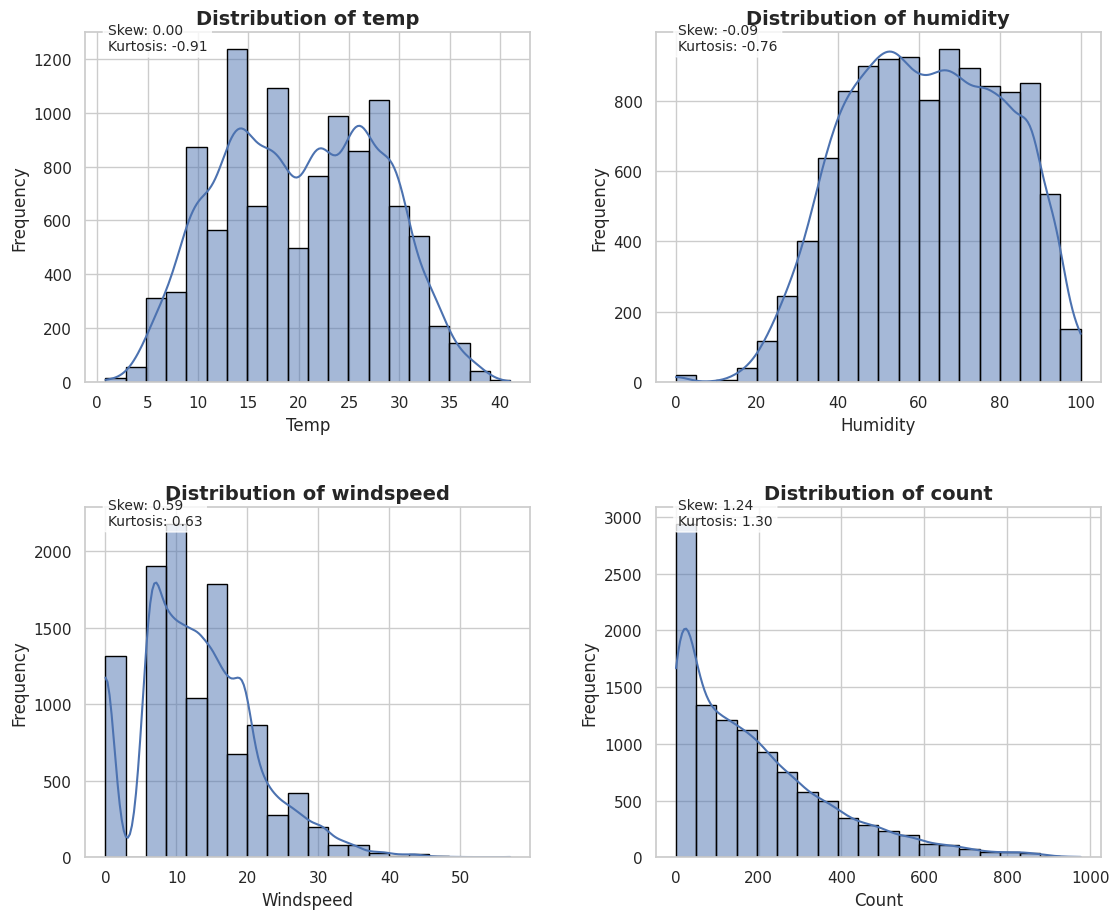

In [23]:
num_col = ['temp', 'humidity', 'windspeed', 'count']

plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")

for i, column in enumerate(num_col, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], bins=20, kde=True, edgecolor='black')

    # Add skewness/kurtosis metrics
    skewness = df[column].skew()
    kurtosis = df[column].kurtosis()

    plt.title(f'Distribution of {column}', fontsize=14, fontweight='bold')
    plt.xlabel(column.title(), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Add statistics annotation
    stats_text = f'Skew: {skewness:.2f}\nKurtosis: {kurtosis:.2f}'
    plt.annotate(stats_text, xy=(0.05, 0.95), xycoords='axes fraction',
                 fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout(pad=3.0)
plt.show()

1. **Temperature Distribution**
   - Approximately normal/symmetric distribution (Skewness ≈ 0)
   - Ideal for parametric statistical tests
   - Supports assumptions of linear modeling techniques

2. **Humidity Distribution**
   - Bimodal/left-skewed distribution (peaks at ~40% and ~80%)
   - Suggests distinct weather patterns (dry vs humid conditions)
   - May represent different seasons or geographical factors

3. **Wind Speed Distribution**
   - Highly right-skewed (most values < 20 km/h)
   - Indicates predominantly calm urban conditions
   - Extreme values (>40) are rare but present

4. **Count (Demand) Distribution**
   - Right-skewed with long tail (high-demand periods)
   - Reflects natural demand patterns with peak hours/weekends
   - Should be analyzed with time-series context

#### **1.2 Distribution of Categories [Season, Weather, Workingday, Holiday]**

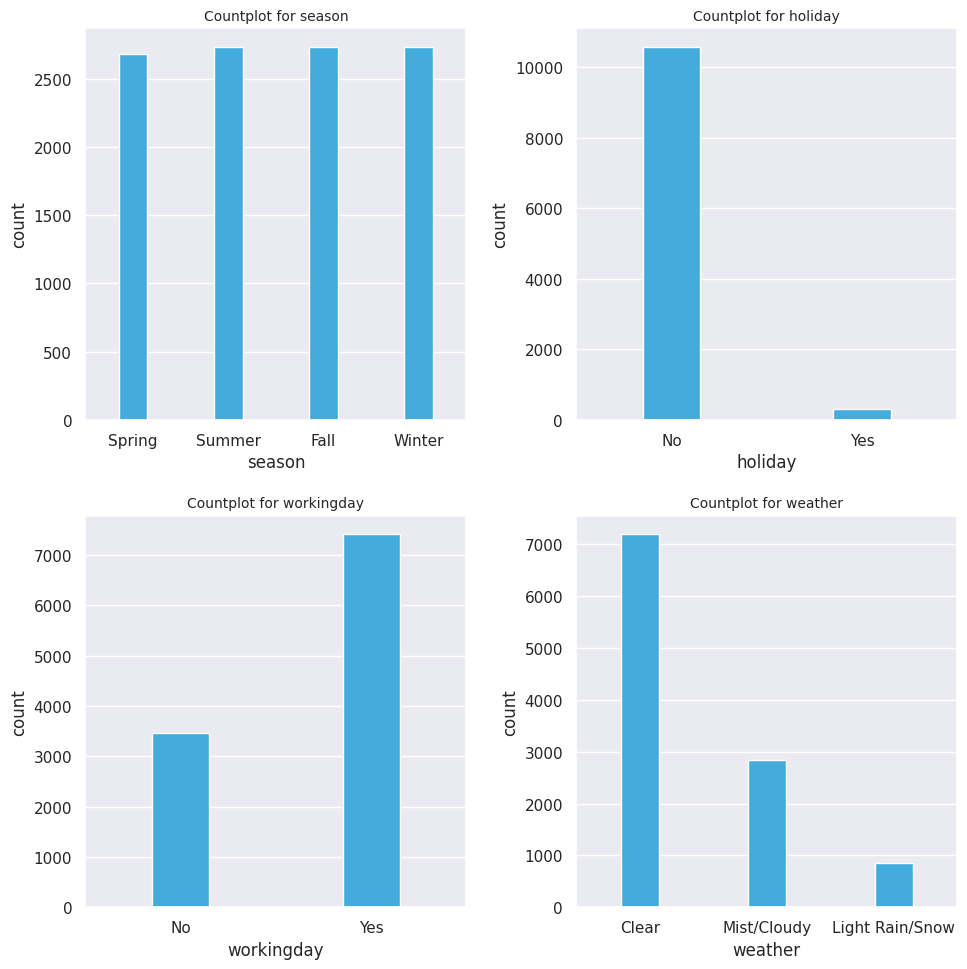

In [24]:
# countplot on categories

plt.figure(figsize=(10, 10))
sns.set(style="darkgrid")

for i, column in enumerate(cat_col, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=column, data=df, color="#29B6F6", width=0.3)
    plt.title(f'Countplot for {column}', fontsize=10)

plt.tight_layout(pad=1.5)
plt.show()

- Observations are evenly distributed across seasons, making seasonal comparisons statistically reliable.
- Working days dominate the dataset, reflecting commuter-driven usage patterns.
- Clear and misty conditions account for the majority of observations, while extreme weather is rare — justifying earlier category removal.
- Holidays represent a small fraction of data, which may limit statistical power when comparing demand patterns.

#### **Average Count of bikes on an hourly basis in a day**

[]

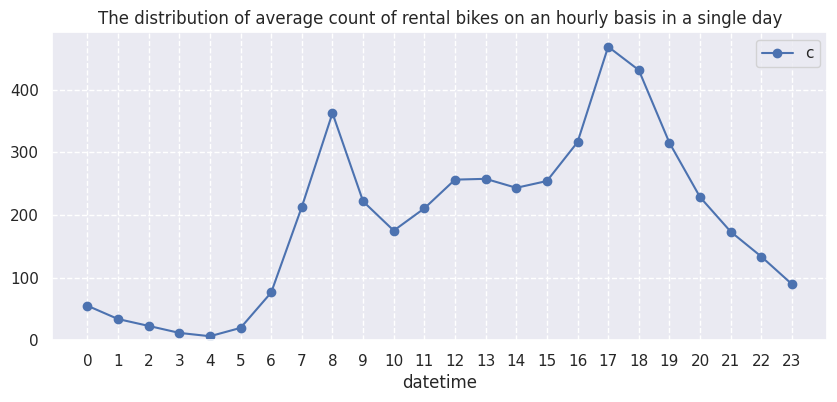

In [25]:
plt.figure(figsize = (10,4))
plt.title("The distribution of average count of rental bikes on an hourly basis in a single day")
df.groupby(by = df['datetime'].dt.hour)['count'].mean().plot(kind = 'line', marker = 'o')
plt.ylim(0,)
plt.xticks(np.arange(0, 24))
plt.legend('count')
plt.grid(axis = 'both', linestyle = '--')
plt.plot()

**INSIGHTS :**

- Morning time 7-9 AM and evening 5-7 PM show maximum usage.
- Above spikes can be due to school / office hours in morning and office closing hours in evening
- Appropriate charges and supply chain can be planned using this information


#### **Average Monthly distribution of count of bikes**

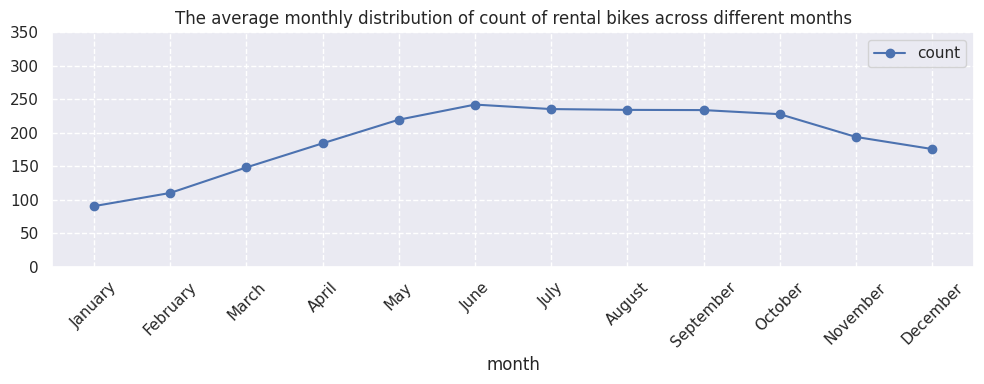

In [26]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10,4))
plt.title("The average monthly distribution of count of rental bikes across different months")

monthly_means = df.groupby('month')['count'].mean().reindex(month_order)

monthly_means.plot(kind='line', marker='o')

plt.ylim(0,)
plt.xticks(range(len(month_order)), month_order, rotation=45)  # Use month names as labels
plt.legend(['count'])
plt.yticks(np.arange(0, 400, 50))
plt.grid(axis='both', linestyle='--')
plt.tight_layout()
plt.show()

**Insights :**
- Count of bikes is highest in the month of June followed by July and August.
- Usage of bikes is least in the month of January

### **Outlier detection using Boxplot**

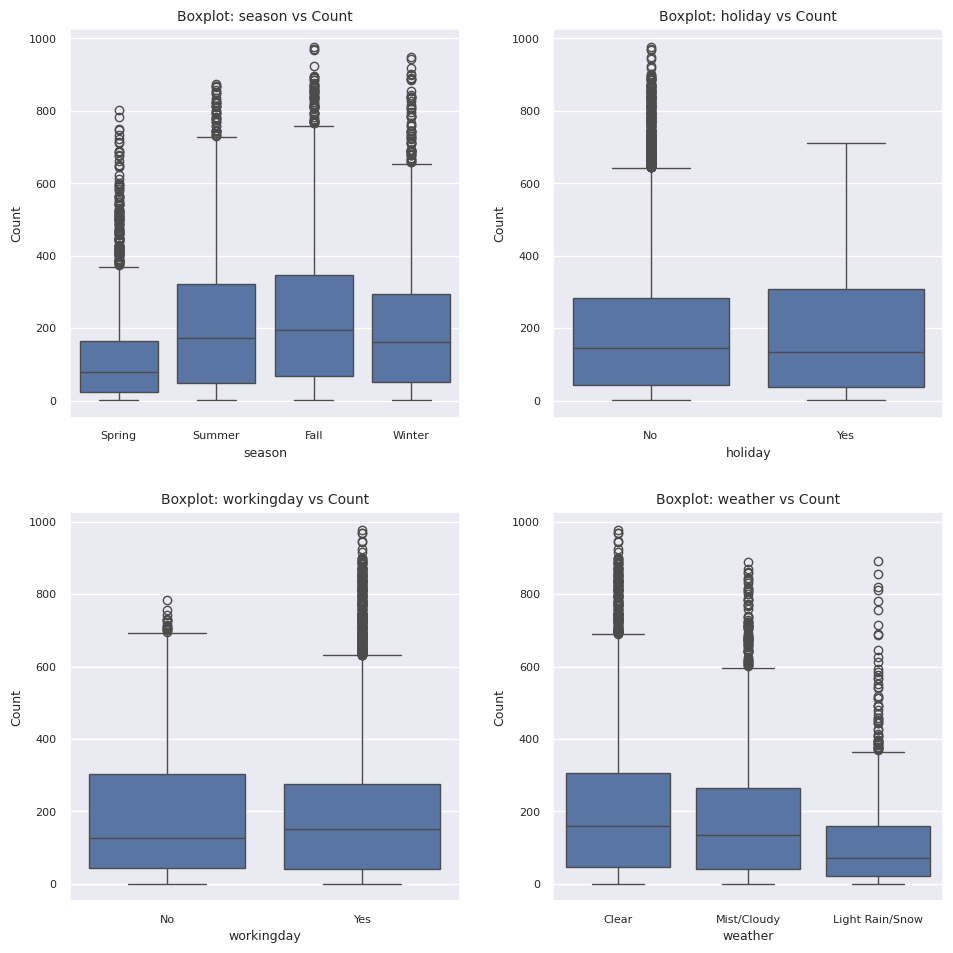

In [27]:
cat_col = ['season', 'holiday', 'workingday', 'weather']

plt.figure(figsize=(10, 10))
sns.set(style='darkgrid')

for i, column in enumerate(cat_col, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column], y=df['count'])
    plt.title(f'Boxplot: {column} vs Count', fontsize=10)
    plt.xlabel(column, fontsize=9)
    plt.ylabel('Count', fontsize=9)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout(pad=2.0)
plt.show()

**1. Holiday vs Count**

- **Observation :-** Non-holidays exhibit higher median demand and more extreme upper outliers. While Holidays show comparatively lower and more stable demand.

**Peak bike usage is strongly driven by routine commuting rather than leisure, confirming Yulu’s role as a daily transport solution.**

**2. Working Day vs Count**

- **Observations :-** Working days show higher median demand and greater number of extreme values. While Non-working days have fewer high outliers.

**Demand spikes on working days are likely due to office-hour commuting patterns, reinforcing weekday dependency.**

**3. Weather vs Count**

- **Observation :-** Clear weather shows highest median demand
and widest variability. Mist/Cloudy conditions reduce demand moderately. And, Light Rain/Snow conditions show Lower median and fewer extreme values

**Favorable weather significantly increases bike usage, while adverse conditions suppress peak demand.**

**4. Season vs Count**

- **Observation :-** Fall and Winter exhibit higher median demand and more frequent extreme values compared to Spring and Summer.

**Peak bike usage is not driven solely by temperature but by a combination of favorable riding conditions and commuting behavior.**

#### **Should Outliers Be Removed?**

No — outliers in dataset should be retained, because High rental counts represent valid peak usage and Removing them would:

- Underestimate true demand

- Bias hypothesis testing results

- Misguide operational decisions

**In demand analysis, outliers are signals of opportunity, not faults / error.**

### **Bi-variate Analysis**

#### **Understanding usage of bikes in each season and weather on a working day and non-working day**

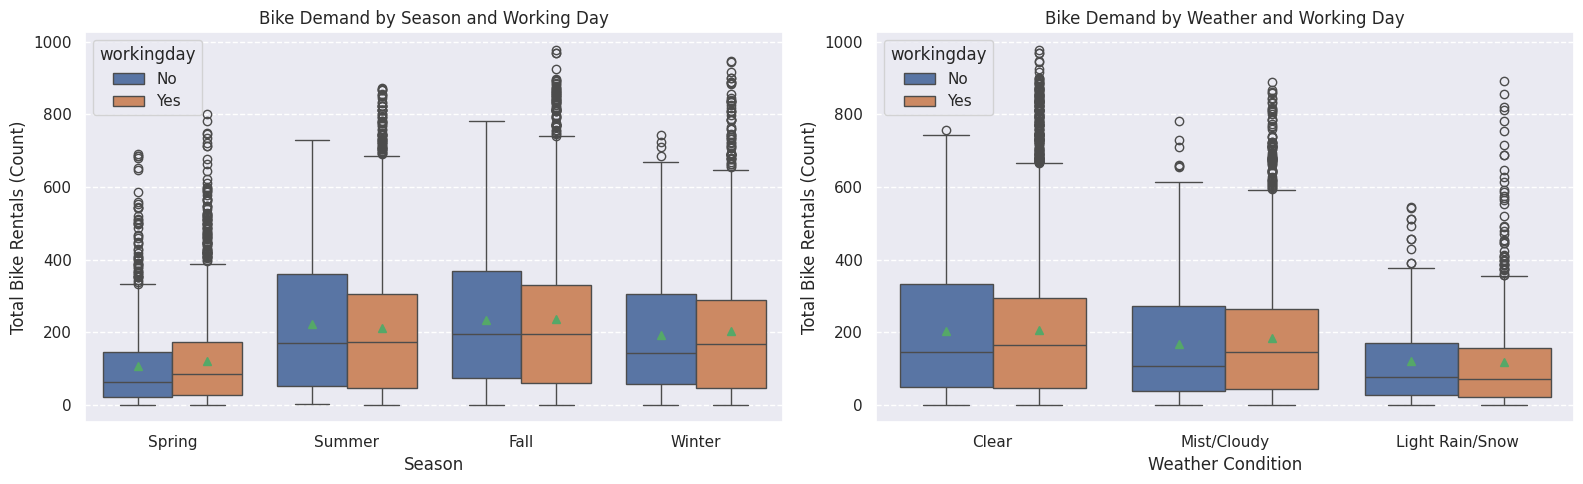

In [28]:
plt.figure(figsize=(16, 5))
sns.set(style='darkgrid')

# Plot 1: Season vs Count
plt.subplot(1, 2, 1)
sns.boxplot(data=df,x='season',y='count',hue='workingday',showmeans=True)
plt.title('Bike Demand by Season and Working Day')
plt.xlabel('Season')
plt.ylabel('Total Bike Rentals (Count)')
plt.grid(axis='y', linestyle='--')

# Plot 2: Weather vs Count
plt.subplot(1, 2, 2)
sns.boxplot(data=df,x='weather',y='count',hue='workingday',showmeans=True)
plt.title('Bike Demand by Weather and Working Day')
plt.xlabel('Weather Condition')
plt.ylabel('Total Bike Rentals (Count)')
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

**INSIGHTS :**

- Bike rental demand is highest during Fall and Summer seasons, indicating that favorable weather conditions significantly boost usage.

- Working days consistently show higher median and mean demand than non-working days across all seasons, highlighting Yulu’s strong dependence on daily commuting patterns.

- Spring season records the lowest bike rental demand, suggesting reduced ridership during this period compared to other seasons.

- Clear weather conditions exhibit the highest bike rental demand, followed by mist/cloudy conditions, while light rain/snow leads to a noticeable drop in usage.

- Across all weather conditions, working days demonstrate higher rental demand than non-working days, reinforcing the commuter-driven nature of the service.

### **Hypothesis Testing & Business Insights**

#### **Q.1 If Working Day has effect on number of electric cycles rented.**

In [29]:
def test_result(p_value,alpha):
  if (p_value < alpha):
    print(f'As the P-value, {p_value}, is less than the level of significance, we reject the Null Hypothesis')
  else:
    print(f'As the P-value, {p_value}, is greater than the level of significance, we fail to reject the Null Hypothesis')

In [30]:
df.groupby('workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
No,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
Yes,7411.0,193.015787,184.525801,1.0,41.0,151.0,277.0,977.0


**Step - 1 Set-up Null Hypothesis & Alternative Hypothesis**

**Since the question asks if there's an effect , this suggests:**

- **Null Hypothesis ($H_0$) :- There is no effect of working day on rentals, i.e. Working Day `has no effect` on number of electric cycles rented**

### $\mu_{working-day}$ = $\mu_{non-working-day}$

- **Alternative Hypothesis ($H_A$) :- There is an effect, i.e. Working Day `has effect` on number of electric cycles rented**

### $\mu_{working-day}$ != $\mu_{non-working-day}$

**Step - 2 Checking for Test Statistics**

Since the number of bike rides on a working day and a non-working day are independent of each other and we have to compare these two categories vs numerical, so we can go for **Independent T-Test** for this analysis.

**Step - 3 Setting Significance level to 5% , alpha = 0.05**

In [31]:
from scipy.stats import ttest_ind   # Importing Library

# Creating sample set for the Hypothesis Testing
working_day = df[df['workingday'] == 'Yes']['count'].sample(3400)
non_working_day = df[df['workingday'] == 'No']['count'].sample(3400)

# Setting up the level of significance
alpha = 0.05

In [32]:
print("The sample standard deviation of the bike on weekday", round(working_day.std(),3))
print("The sample standard deviation of the bike on weekday", round(non_working_day.std(),3))

The sample standard deviation of the bike on weekday 184.01
The sample standard deviation of the bike on weekday 173.631


In [33]:
t_stats, p_value = t_stats, p_value = ttest_ind(working_day, non_working_day, equal_var=False, alternative='two-sided')
print("T-Statistics =",t_stats)
print("P-value =",p_value)
print('----'*10)
test_result(p_value,alpha)

T-Statistics = 1.0715726283884632
P-value = 0.28395020164544255
----------------------------------------
As the P-value, 0.28395020164544255, is greater than the level of significance, we fail to reject the Null Hypothesis


#### **Insight 1: Working Day Does Not Significantly Change Demand**

**Finding :-** There is no statistically significant difference in yulu bike rentals between working days and non-working days.

**Business Interpretation :-**

- Although peak-hour patterns differ, overall daily demand remains similar

- Non-working days compensate through leisure, errands, and local travel

- Yulu is not solely dependent on office commuting

**This means:-** Yulu functions as a general-purpose urban mobility solution, not just a weekday commuter service.

### **Q.2 If Holiday has effect on number of electric cycles rented.**

In [34]:
df.groupby('holiday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
No,10574.0,191.744278,181.521514,1.0,43.0,145.0,283.0,977.0
Yes,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


**Step - 1 Set-up Null Hypothesis & Alternative Hypothesis**

**Since the question asks if there's an effect , this suggests:**

- **Null Hypothesis ($H_0$) :- There is no effect of holiday on rentals bike, i.e. Holiday `has no effect` on number of electric cycles rented**

### $\mu_{holiday}$ = $\mu_{non-holiday}$

- **Alternative Hypothesis ($H_A$) :- There is an effect, i.e. Holiday `has effect` on number of electric cycles rented**

### $\mu_{holiday}$ != $\mu_{non-holiday}$

**Step - 2 Checking for Test Statistics**

Since the number of bike rides on a holiday and a non-holiday are independent of each other and we have to compare these two categories vs numerical, so we can go for **Independent T-Test** for this analysis.

**Step - 3 Setting Significance level to 5% , alpha = 0.05**

In [35]:
holiday = df[df['holiday'] == 'Yes']['count'].sample(300)
non_holiday = df[df['holiday'] == 'No']['count'].sample(300)

print("The sample standard deviation of the bike on holiday", round(holiday.std(),3))
print("The sample standard deviation of the bike on non-holiday", round(non_holiday.std(),3))

The sample standard deviation of the bike on holiday 168.604
The sample standard deviation of the bike on non-holiday 177.007


In [36]:
t_stats, p_value = t_stats, p_value = ttest_ind(holiday, non_holiday, equal_var=False, alternative='two-sided')
print("T-Statistics =",t_stats)
print("P-value =",p_value)
print('----'*10)
test_result(p_value,alpha)

T-Statistics = 0.23381529537900245
P-value = 0.815208584308536
----------------------------------------
As the P-value, 0.815208584308536, is greater than the level of significance, we fail to reject the Null Hypothesis


#### **Insight 2 : Holidays Do Not Reduce Overall Bike Demand**

**Findings :-** Holiday and non-holiday rental volumes are statistically similar.

**Business Interpretation :-**

- A substantial portion of Yulu’s usage is functional rather than recreational

- Non-commute travel (errands, short trips, local mobility) compensates for reduced office commuting on holidays

- Users continue to rely on Yulu for short-distance, last-mile transportation, even on holidays

**This means :-** Holidays should not be treated as “low-demand days” operationally.

### **Q.3 If the number of cycles rented similar or different in different seasons.**

In [37]:
df.groupby('season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
Spring,2685.0,116.325512,125.293931,1.0,24.0,78.0,164.0,801.0
Summer,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
Fall,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
Winter,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


**Step - 1 Set-up Null Hypothesis & Alternative Hypothesis**

**Since the question asks if there's an effect , this suggests:**

- **Null Hypothesis ($H_0$) :- There is no effect of seasons on rentals, i.e. The Average number of bikes rented is same for all seasons.**

- **Alternative Hypothesis ($H_A$) :- There is an effect of seasons on rentals, i.e. The Average number of bikes rented is different for all seasons.**

**Step - 2 Checking for Test Statistics**

We have count of bike rides for seasons -- summer, fall, winter, spring, which means categories are more than 2. To compare the means of 4 independent categories, the **Anova test** is selected.

Assumptions of Anova:

1. Data should follow a Normal / Gaussian distribution

2. Data should be independent

3. Equal variance in all the groups

4. Sample size should be randomly drawn.

**Step - 3 Setting Significance level to 5% , alpha = 0.05**

- **Checking Distribution using QQ Plot and Shapiro - Wilk Test**

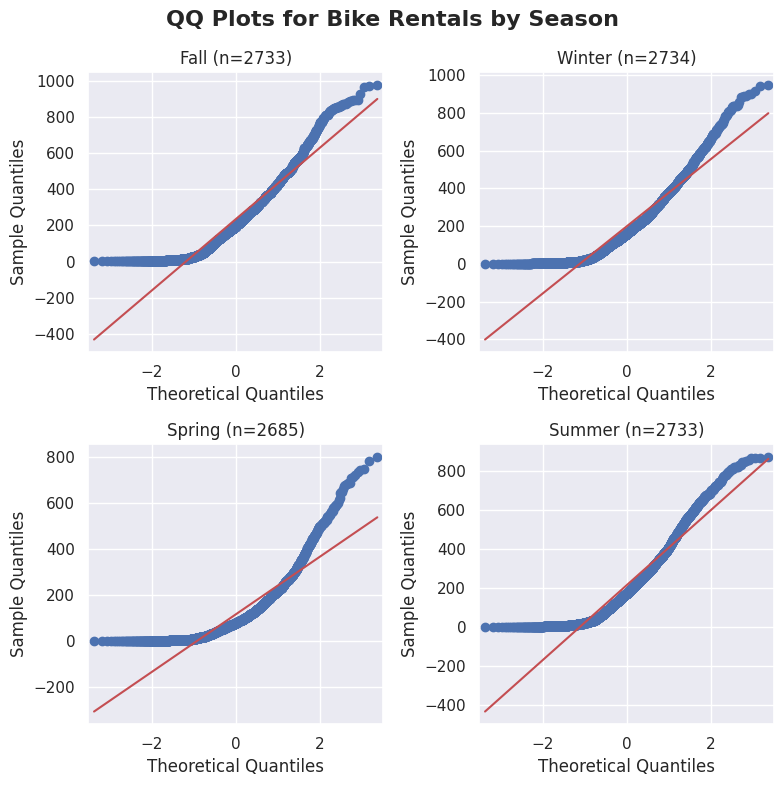

In [38]:
from statsmodels.graphics.gofplots import qqplot
fall = df[df['season'] == 'Fall']['count']
winter = df[df['season'] == 'Winter']['count']
spring = df[df['season'] == 'Spring']['count']
summer = df[df['season'] == 'Summer']['count']

# Create a 2x2 grid of QQ plots
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle('QQ Plots for Bike Rentals by Season', fontsize=16, fontweight='bold')

# Fall QQ plot
qqplot(fall, line='s', ax=axes[0, 0])
axes[0, 0].set_title(f'Fall (n={len(fall)})')
axes[0, 0].set_xlabel('Theoretical Quantiles')
axes[0, 0].set_ylabel('Sample Quantiles')

# Winter QQ plot
qqplot(winter, line='s', ax=axes[0, 1])
axes[0, 1].set_title(f'Winter (n={len(winter)})')
axes[0, 1].set_xlabel('Theoretical Quantiles')
axes[0, 1].set_ylabel('Sample Quantiles')

# Spring QQ plot
qqplot(spring, line='s', ax=axes[1, 0])
axes[1, 0].set_title(f'Spring (n={len(spring)})')
axes[1, 0].set_xlabel('Theoretical Quantiles')
axes[1, 0].set_ylabel('Sample Quantiles')

# Summer QQ plot
qqplot(summer, line='s', ax=axes[1, 1])
axes[1, 1].set_title(f'Summer (n={len(summer)})')
axes[1, 1].set_xlabel('Theoretical Quantiles')
axes[1, 1].set_ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()

- Above QQ Plots do not show linearity and therefore do not follow normal distribution.

**Checking the distribution using Shapiro-Wilk Test**

- Null Hypothesis $H_0$: The sample follow Normal Distribution

- Alternate Hypothesis $H_A$: The sample do not follow Normal Distribution

- alpha = 0.05

In [39]:
from scipy.stats import shapiro
s_stats, p_value = shapiro(df['count'].sample(5000))
print(f'The P-Value is :- {p_value}')
test_result(p_value, alpha)

The P-Value is :- 5.664225996906662e-52
As the P-value, 5.664225996906662e-52, is less than the level of significance, we reject the Null Hypothesis


- Using QQ Plot and Shapiro-Wilk Test we get to know that our data is not Normally distributed.

**Also, Check the variance of the data, Using Levene's Test's**

- Null Hypothesis $H_0$ :- All the count variance are equal.

- Alternate Hypothesis $H_A$ :- Atleast one variance is different from the rest.

In [40]:
from scipy.stats import levene
l_stats, p_value = levene(fall,winter,spring,summer)
print(f'The P-Value is :- {p_value}')
test_result(p_value, alpha)

The P-Value is :- 1.1170990373788981e-118
As the P-value, 1.1170990373788981e-118, is less than the level of significance, we reject the Null Hypothesis


- From the output, it is clear that variance is not same for all seasons and the assumption is failed.

#### **Anova-Test**

In [41]:
from scipy.stats import f_oneway
anova_stats, p_value = f_oneway(fall,winter,spring,summer)
print("Anova-Statistics =",anova_stats)
print("P-value =",p_value)
print('----'*10)
test_result(p_value,alpha)

Anova-Statistics = 236.94289498936624
P-value = 6.204069471997093e-149
----------------------------------------
As the P-value, 6.204069471997093e-149, is less than the level of significance, we reject the Null Hypothesis


**Note :- Since, we are using the Anova Test, and the result of Levene Test and Shapiro-Wilk test/QQ Plot failed, The result we have received may not be accurate.**

- This data is not suitable to perform a ANOVA test since the first and third assumptions are not met.

- This is what can happen in business scenarios. Not every theory can be applied to the business problem. But there is a way for everything.

**Since Anova is failed, We will now use try Kruskal test.**

- Null Hypothesis ($H_0$) :- The average number of bike is same for all season.

- Alternate Hypothesis ($H_A$) :- The average number of bike is different for all season.

**The level of significane (alpha) = 0.05**

In [42]:
from scipy.stats import kruskal
k_stats, p_value = kruskal(fall,winter,spring,summer)
print("Kruskal-Statistics =",k_stats)
print("P-value =",p_value)
print('----'*10)
test_result(p_value,alpha)

Kruskal-Statistics = 699.8821417617874
P-value = 2.2263612957303657e-151
----------------------------------------
As the P-value, 2.2263612957303657e-151, is less than the level of significance, we reject the Null Hypothesis


#### **Insight 3: Seasonality Has a Strong Impact on Bike Rentals**

**Findings :-** Bike rentals differ significantly across seasons, with Fall and Summer showing the highest demand.

**Business Interpretation :-**

- Favorable riding conditions and stable weather increase usage

- Spring shows comparatively lower demand

- Seasonality affects demand more than calendar effects (working day / holiday)

**This Means :-** Seasonal demand planning is critical for maximizing utilization and revenue.

### **Q.4 If the number of cycles rented similar or different in different weather.**

In [43]:
df.groupby('weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
Clear,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
Mist/Cloudy,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
Light Rain/Snow,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0


**Step - 1 Set-up Null Hypothesis & Alternative Hypothesis**

**Since the question asks if there's an effect , this suggests:**

- **Null Hypothesis ($H_0$) :- There is no effect of weather on rentals bike, i.e. The Average number of bikes rented is same for all weather.**

- **Alternative Hypothesis ($H_A$) :- There is an effect of weather on rentals bike, i.e. The Average number of bikes rented is different for all weather.**

**Step - 2 Checking for Test Statistics**

We have count of bike rides for weather -- Clear, Mist/Cloudy, Light Rain/Snow, which means categories are more than 2. To compare the means of 3 independent categories, the **Anova test** is selected.

Assumptions of Anova:

1. Data should follow a Normal / Gaussian distribution

2. Data should be independent

3. Equal variance in all the groups

4. Sample size should be randomly drawn.

**Step - 3 Setting Significance level to 5% , alpha = 0.05**

- **Checking Distribution using QQ Plot and Shapiro - Wilk Test**

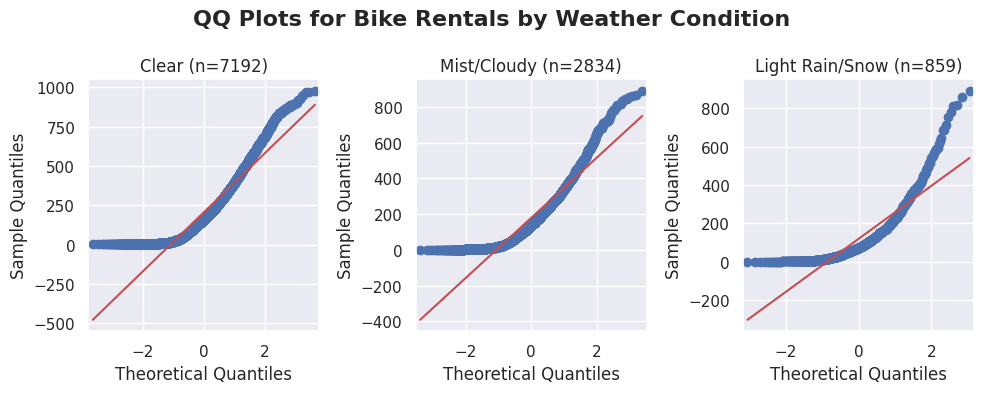

In [44]:
Clear = df[df['weather'] == 'Clear']['count']
Mist_or_Cloudy = df[df['weather'] == 'Mist/Cloudy']['count']
Light_Rain_or_Snow = df[df['weather'] == 'Light Rain/Snow']['count']


# Create a 1x3 grid of QQ plots
fig, axes = plt.subplots(1, 3, figsize=(10,4))
fig.suptitle('QQ Plots for Bike Rentals by Weather Condition', fontsize=16, fontweight='bold')

# Clear QQ plot
qqplot(Clear, line='s', ax=axes[0])
axes[0].set_title(f'Clear (n={len(Clear)})')
axes[ 0].set_xlabel('Theoretical Quantiles')
axes[ 0].set_ylabel('Sample Quantiles')

# Mist_or_Cloudy QQ plot
qqplot(Mist_or_Cloudy, line='s', ax=axes[1])
axes[1].set_title(f'Mist/Cloudy (n={len(Mist_or_Cloudy)})')
axes[1].set_xlabel('Theoretical Quantiles')
axes[1].set_ylabel('Sample Quantiles')

# Light_Rain_or_Snow QQ plot
qqplot(Light_Rain_or_Snow, line='s', ax=axes[2])
axes[2].set_title(f'Light Rain/Snow (n={len(Light_Rain_or_Snow)})')
axes[2].set_xlabel('Theoretical Quantiles')
axes[2].set_ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()

- Above QQ Plots do not show linearity and therefore do not follow normal distribution.

**Checking the distribution using Shapiro-Wilk Test**

- Null Hypothesis $H_0$: The sample follow Normal Distribution

- Alternate Hypothesis $H_A$: The sample do not follow Normal Distribution

- alpha = 0.05

In [45]:
s_stats, p_value = shapiro(df['count'].sample(5000)) # Shapiro-Wilk Test
print(f'The statistics is :- {s_stats}')
print(f'The P-Value is :- {p_value}')
test_result(p_value, alpha)

The statistics is :- 0.8809401049980914
The P-Value is :- 3.431430299557009e-52
As the P-value, 3.431430299557009e-52, is less than the level of significance, we reject the Null Hypothesis


- Using QQ Plot and Shapiro-Wilk Test we get to know that our data is not Normally distributed.

**Let's Also, Check the variance of the data, Using Levene's Test**

- Null Hypothesis $H_0$ :- All the count variance are equal.

- Alternate Hypothesis $H_A$ :- Atleast one variance is different from the rest.

In [46]:
l_stats, p_value = levene(fall,winter,spring,summer)
print(f'The P-Value is :- {p_value}')
test_result(p_value, alpha)

The P-Value is :- 1.1170990373788981e-118
As the P-value, 1.1170990373788981e-118, is less than the level of significance, we reject the Null Hypothesis


- From the output, it is clear that variance is not same for all seasons and the assumption is failed.

#### **Anova-Test**

In [47]:
anova_stats, p_value = f_oneway(Clear, Mist_or_Cloudy, Light_Rain_or_Snow)
print("Anova-Statistics =",anova_stats)
print("P-value =",p_value)
print('----'*10)
test_result(p_value,alpha)

Anova-Statistics = 98.28356881946705
P-value = 4.976448509904196e-43
----------------------------------------
As the P-value, 4.976448509904196e-43, is less than the level of significance, we reject the Null Hypothesis


**Note :- Since, we are using the Anova Test, and the result of Levene Test and Shapiro-Wilk test/QQ Plot failed, The result we have received may not be accurate.**

- This data is not suitable to perform a ANOVA test since the first and third assumptions are not met, i.e. data is not normal distributed and variance is different.

- This is what can happen in business scenarios. Not every theory can be applied to the business problem. But there is a way for everything.

**Since Anova is failed, We will now use try Kruskal test.**

- Null Hypothesis ($H_0$) :- The average number of bike is same for all weather.

- Alternate Hypothesis ($H_A$) :- The average number of bike is different for all weather.

**The level of significane (alpha) = 0.05**

In [48]:
k_stats, p_value = kruskal(Clear, Mist_or_Cloudy, Light_Rain_or_Snow)
print("Kruskal-Statistics =",k_stats)
print("P-value =",p_value)
print('----'*10)
test_result(p_value,alpha)

Kruskal-Statistics = 204.95566833068537
P-value = 3.122066178659941e-45
----------------------------------------
As the P-value, 3.122066178659941e-45, is less than the level of significance, we reject the Null Hypothesis


#### **Insight 4: Weather Conditions Significantly Influence Demand**

**Findings :-** Bike rentals vary significantly across weather categories.

**Observed Pattern :**

- Clear weather → highest demand

- Mist/Cloudy → moderate decline

- Light Rain/Snow → sharp drop in usage

**Business Interpretation :-**

- Riders are sensitive to comfort and safety

- Adverse weather suppresses demand but does not eliminate it, especially on working days

**This Means :-** - Weather forecasting can be used for:

  - Demand prediction

  - Dynamic pricing

  - Proactive fleet re-balancing

### **Q.5 If the Weather is dependent on season or not.**

Well, the general answer might be yes but let’s find if this is statistically significant to claim our assumption for this data.

In [49]:
contingency_table = pd.crosstab(df['season'], df['weather'])
contingency_table

weather,Clear,Mist/Cloudy,Light Rain/Snow
season,,,
Spring,1759,715,211
Summer,1801,708,224
Fall,1930,604,199
Winter,1702,807,225


**Step - 1 Set-up Null Hypothesis & Alternative Hypothesis**

**Since the question asks if there's an effect , this suggests:**

- **Null Hypothesis ($H_0$) :- Weather and Season are independent on each other.**

- **Alternative Hypothesis ($H_A$) :- Weather and Season are dependent on each other.**

**Step - 2 Checking for Test Statistics**

To check if there is a significant relationship between 2 categorical variables, **chi-square test** of independence can be used.

**Step - 3 Setting Significance level to 5% , alpha = 0.05**

In [50]:
from scipy.stats import chi2_contingency
chi2_stats, p_value, dof, exp_freq = chi2_contingency(contingency_table, correction=False)
print("Chi-Statistics =",chi2_stats)
print("P-value =",p_value)
print("Degree of Freedom =",dof)
print("Expected Frequency =",exp_freq)

print('----'*10)
test_result(p_value,alpha)

Chi-Statistics = 46.10145731073249
P-value = 2.8260014509929343e-08
Degree of Freedom = 6
Expected Frequency = [[1774.04869086  699.06201194  211.8892972 ]
 [1805.76352779  711.55920992  215.67726229]
 [1805.76352779  711.55920992  215.67726229]
 [1806.42425356  711.81956821  215.75617823]]
----------------------------------------
As the P-value, 2.8260014509929343e-08, is less than the level of significance, we reject the Null Hypothesis


#### **Insight 5: Weather and Season Are Statistically Dependent**

**Finding :-** Weather patterns are statistically dependent on seasons, though the strength of association is weak.

**Business Interpretation :-**

- Seasons influence the probability of certain weather conditions

- However, season alone is not a reliable proxy for daily demand

- Real-time weather matters more than seasonal labels

**This means :-** Operational decisions should prioritize actual weather forecasts, not just seasonal assumptions.

### **Executive Summary**

This analysis was conducted to identify the key factors influencing demand for Yulu’s shared electric cycles. Using exploratory data analysis and hypothesis testing, we evaluated the impact of working days, holidays, seasons, and weather conditions on rental demand.

The findings indicate that **demand is multi-factor driven, with seasonality and weather playing a statistically significant role, while working day and holiday effects are less pronounced than expected**. These insights can be leveraged to improve operational efficiency, pricing strategy, and demand forecasting.

### **Strategic Recommendations for Yulu Growth**

1. **Optimize Bike Distribution in Peak Months :-** Concentrate bike deployment efforts during peak months, especially in June, July, and August, to meet increased demand and capitalize on favorable weather conditions.

2. **Focus on Peak-Hour Optimization Instead of Day-Type :-** Since working vs non-working days show similar averages, focus on Morning (7–9 AM) & Evening (5–7 PM). Also, Ensure bike availability and battery readiness during these hours.

3. **Enhance User Engagement in Off-Peak Months :-** Implement targeted promotional campaigns or discounts during off-peak months (e.g., January to March) to encourage increased bike rentals and maintain consistent revenue flow.

4. **Optimize Seasonal Fleet Allocation :-** To higher revenue capture during peak seasons and cost optimization during lean periods :
  
  - Tailor marketing efforts to leverage the seasonal trend, promoting Yulu's services more aggressively during summer months to attract a larger user base.
  
  - Plan maintenance and redistribution during low-demand Spring periods
  
  - Align staffing and battery management with seasonal peaks

5. **Enhance User Experience :-** Invest in technology and infrastructure to improve the overall user experience, including app features using AI, time to time bike maintenance, fostering loyalty and repeat business.

6. **Improve Weather Data Collection :-** Given the lack of records for extreme weather conditions, consider improving the data collection process for such scenarios. Having more data on extreme weather conditions can help to understand customer behavior and adjust the operations accordingly, such as offering specialized bike models for different weather conditions or implementing safety measures during extreme weather.

7. **Special Occasion Discounts :-** Since Yulu focusses on providing a sustainable solution for vehicular pollution, it should give special discounts on the occassions like `Zero Emissions Day (21st September), Earth day (22nd April), World Environment Day (5th June) etc` in order to attract new users.

8. **Implement Weather-Aware Demand Forecasting :-**

- Create weather-based promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts. Yulu can offer weather-specific discounts to attract more customers during these favorable weather conditions.

- To improved asset utilization and reduced operational inefficiencies.
  
  - Integrate real-time and short-term weather forecasts into demand planning

  - Adjust fleet availability dynamically on rainy or misty days

  - Reduce idle inventory during adverse weather periods

- To stimulate demand during low-usage periods without revenue dilution introduced ~ Weather-based incentives (e.g., light rain discounts) and Spring-season promotional campaigns to stimulate demand.

9. **Social Media Marketing :-** Yulu's growth through strategic brand storytelling and community engagement. Creating viral trends and educational reels showcasing eco-friendly commutes can attract urban millennials. Leveraging user-generated content and influencer collaborations builds trust, while targeted campaigns drive subscriptions, enhancing visibility and adoption in competitive markets.

10. **Customer Feedback and Reviews :-** Encourage customers to provide feedback and reviews on their biking experience. Collecting feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.